# Exercise: 4

In [7]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcdefaults()
import matplotlib as mpl
from matplotlib import rc
mpl.rc('font', family='serif', size=18)

NameError: name 'plt' is not defined

In [2]:
import matplotlib.pyplot as plt

red = (0.74, 0.1, 0.1, 1)
light_red = (0.74, 0.1, 0.1, 0.4)
blue = (0, 0.37, 0.99, 1)
light_blue = (0.42, 0.8, 0.93, 0.4)
lighter_blue = (0.42, 0.8, 0.93, 0.3)
lightest_blue = (0.42, 0.8, 0.93, 0.1)
green = (0.23, 0.85, 0.25, 1)
light_green = (0.23, 0.85, 0.25, 0.4)
lightest_green = (0.23, 0.85, 0.25, 0.1)



from styles.matplotlib_style import *
# plt.style.use("plot_style")

OSError: 'standardStyle.mplstyle' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [179]:
import math
import numpy as np  
# import matplotlib.pyplot as plt

In [8]:
#CONSTANTS
R_s = 9*6.9599e10  #cm
T_s = 40000.0      #K
c = 2.99792458e10   #cm/s
k = 1.380658e-16    #erg/K
h = 6.260755e-27     #erg s
n_H = 10.0 #cm^-3
T_e = 7500.
T_4 = 0.75

a = 1.0973731569e5 * c
b =  1.5e16
N = 15

# stellar_temp = 40_000
# stellar_radius = 9*6.9599e10

In [9]:
def luminosity_func(nu):
    B = ((2*h*nu**3 )/(c**2))*(1/(np.exp(h*nu/(k*T_s))-1))
    L = 4*(np.pi**2)*(R_s**2)*B
    integrand = L/(h*nu)
    return integrand

In [12]:
def integral_QH0(a, b, N,func):
    I_01 = Trap(a, b, 1,func)
    I1 = [I_01]

    for i in range(1, N+1):
        k_odd = [k_i for k_i in range(1, 2**i+1) if k_i%2!=0]          
        I_ = [func(a+(b-a)/2**i*k) for k in k_odd]
        I_ = np.array(I_)
        I_i1 = 0.5*((I1[i-1]) + (b-a)/2**(i-1)*np.sum(I_))
        I1.append(I_i1)

    #I IS THE ROMBERG MATRIX      
    I = np.zeros((N + 1, N + 1))
    print(np.shape(I1))
    print(np.shape(I))
    I[:, 0] = I1

    for j in range(1, N + 1):
        for i in range(0, N + 1 - j):
            I_ij = (4 ** (j) * I[i + 1, j - 1] - I[i, j - 1])/(4 ** (j) - 1)
            I[i, j] = I_ij
    return I
I = integral_QH0(a,b,N,luminosity_func)
Q_H0 = I[0, -1]

NameError: name 'Trap' is not defined

In [11]:
#print("integral val: ", Q_H0)

def stromgren_radius(Q_H0,T_4, n_H):
    #STROMGREN RADIUS EQUATION
    R = 3.15e-15*(Q_H0/n_H**2)**(1/3)*T_4**(0.28)
    return R
R = stromgren_radius(Q_H0,T_4,n_H)

#print("The strömgren radius is ", R)

NameError: name 'Q_H0' is not defined

/tmp/ipykernel_12586/1884056588.py:3: RuntimeWarning: divide by zero encountered in true_divide
  B = ((2*h*nu**3 )/(c**2))*(1/(np.exp(h*nu/(k*T_s))-1))
/tmp/ipykernel_12586/1884056588.py:3: RuntimeWarning: invalid value encountered in multiply
  B = ((2*h*nu**3 )/(c**2))*(1/(np.exp(h*nu/(k*T_s))-1))


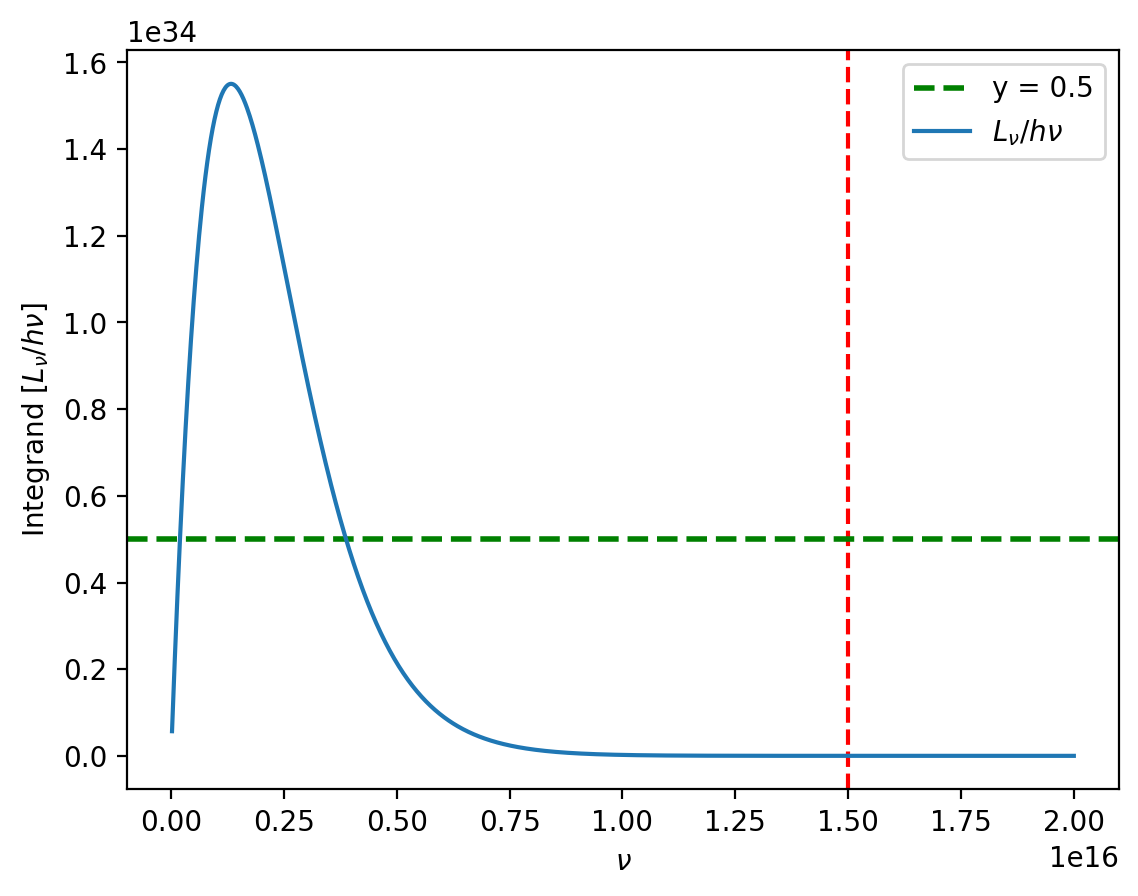

In [17]:
#PLOTTING OF INTEGRAND FUNCTION
def luminosity_func(nu):
    B = ((2*h*nu**3 )/(c**2))*(1/(np.exp(h*nu/(k*T_s))-1))
    L = 4*(np.pi**2)*(R_s**2)*B
    integrand = L/(h*nu)
    return integrand

nu = np.linspace(0,2e16,1000)
plt.axvline(1.5e16,ls='--',c='r')
plt.axhline(0.5e34, color='g', linestyle='--', linewidth=2, label='y = 0.5')

plt.plot(nu,luminosity_func(nu), label='$L_{\\nu}/h{\\nu}$')
plt.xlabel('$\\nu$')
plt.ylabel('Integrand [$L_{\\nu}/h{\\nu}$]')
plt.legend()

### Implementation: Trapezoidal Rule

In [29]:
# N = 15
# for i in range(1, N+1):
#     odd_numbers = [num for num in range(1, 2**i-1+2) if num%2!=0]
#     print(f'i1:{2**i-1+2}')
#     print(f'i2:{2**i+1}')

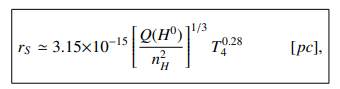

In [105]:
lower_bound = 1.0973731569E+05 * c
upper_bound = 1.25e16*5
step_size = 15

integral_value_Q_H0_matrix = Romberging(a=lower_bound, b=upper_bound, N=step_size, func=specific_luminosity_planck)
best_romberg_value = integral_value_Q_H0_matrix[0, -1]

print("integral val: ", best_romberg_value)

def calculate_r_s(QH0, T, n_H):
    # stromgren radius
    return 3.15e-15 * (QH0/n_H**2)**(1/3)*T**(0.28)

strömgren_radius = calculate_r_s(QH0=best_romberg_value, T=0.75, n_H=10)

print("The strömgren radius is ", strömgren_radius)

2.1746607500246876e+50
1.0873303750124238e+50
5.436658118187206e+49
2.7261632468527743e+49
1.505173369050803e+49
1.1193584303267961e+49
1.0215850800974535e+49
9.973142065825918e+48
9.9126209525344e+48
9.89750117976525e+48
9.893721904848789e+48
9.892777128069128e+48
9.892540936498901e+48
9.892481888770429e+48
9.892467126848569e+48
integral val:  9.89246220620886e+48
The strömgren radius is  13.440925506606165


In [13]:
import math
import numpy as np  # thanks flo
import matplotlib.pyplot as plt

h = 6.6260755E-27
c = 2.99792458E+10
k = 1.380658E-16

def f(x):
   return math.sin(x)


def another_example(x):
    return np.exp(-x**2)

def yet_another_example(x):
    return 1/(1+x**2)


def yet_another_another_example(x):
    return x*np.exp(2*x)


def Trap(a, b, n, func):
    # N IS THE NUMBER OF INTERVALS
    h = (b - a) / n
    area = (func(a) + func(b))/2.0

    for i in range(1, n):
        x = a + i*h  # increment the x
        area = area + func(x)
    return area * h


def Romberging(a, b, N, func):

    first_value = Trap(a, b, 1, func)
    first_column = [first_value]
    print(first_column)

    for i in range(1, N+1):
        odd_numbers = [num for num in range(1, 2**i-1+2) if num%2!=0]  # flos contribution
        samples = [func(a+(b-a)/2**i*k) for k in odd_numbers]

        to_sum = np.array(samples)
        term = 1/2 * ((first_column[i-1]) + (b-a)/2**(i-1)*np.sum(to_sum))
        first_column.append(term)

    # alis approach
    romberg_matrix = np.zeros((N + 1, N + 1))
    romberg_matrix[:, 0] = first_column

    # alis approach
    for j in range(1, N + 1):
        for i in range(0, N + 1 - j):
            # is the row index
            # print("j, i ", j, i)
            # romberg_matrix[i, j] = area_contribution
            I = romberg_matrix
            area = (4 ** (j) * I[i + 1, j - 1] - I[i, j - 1]) / (4 ** (j) - 1)
            romberg_matrix[i, j] = area
        # j is the column index

    return romberg_matrix


def black_body_intensity(nu, T):
    # This is B_ν
    return (2*h*nu**3 / c**2) * 1/(np.exp(h*nu/(k*T))-1)


def black_body_luminosity(nu, T, R):
    # This is L_ν
    return 4*np.pi**2 * R**2 * black_body_intensity(nu, T)


def specific_luminosity_planck(nu):
    # Τhis is L_ν / (hν)
    stellar_temp = 40_000
    stellar_radius = 9*6.9599e10
    return black_body_luminosity(nu=nu, T=stellar_temp, R=stellar_radius) / (h*nu)

plot_integrand = False

if plot_integrand:
    nu_continuous = np.linspace(0, 2*1e16, 1000)
    plt.plot(nu_continuous, specific_luminosity_planck(nu=nu_continuous), "b.")
    plt.xlabel("Frequency")
    plt.ylabel("Integrand of $Q(H^0)$")
    plt.show()


lower_bound = 1.0973731569E+05 * c
upper_bound = 1.25e16*5
step_size = 15

integral_value_Q_H0_matrix = Romberging(a=lower_bound, b=upper_bound, N=step_size, func=specific_luminosity_planck)
best_romberg_value = integral_value_Q_H0_matrix[0, -1]

print("integral val: ", best_romberg_value)

def calculate_r_s(QH0, T, n_H):
    # stromgren radius
    return 3.15e-15 * (QH0/n_H**2)**(1/3) * T**(0.28)

strömgren_radius = calculate_r_s(QH0=best_romberg_value, T=0.75, n_H=10)

print("The strömgren radius is ", strömgren_radius)

[2.1746607500246876e+50]
integral val:  9.89246220620886e+48
The strömgren radius is  13.440925506606165


In [5]:
first_value

NameError: name 'first_value' is not defined

In [139]:
# Purpose: Calculate area using trapezoidal rule.
# Input: a, b, n
# Output: estimate of area between x-axis, x = a, x = b
# using n trapezoids.
# Usage: python Trapez.py
# Note: The function f(x) is hardwired.
from sys import stdin #standard input
import math
# Function: f
# Purpose: Compute value of function to be integrated
# Input args: x (double)
# Return val: f(x) (double)
def f(x):
    return_val = math.sin(x)
    return return_val
# End of f 
# Function: Trap
# Purpose: Estimate area using the trapezoidal rule
# Input args: a: left endpoint (double)
# b: right endpoint (double)
# n: number of trapezoids (int)
# h: stepsize = length of base of trapezoids (double)
# Return val: Trapezoidal rule estimate of area between x-axis,

T_n = []
def Trap(a, b, n, h):
    area = (f(a) + f(b))/2
#     area_1 = f(a)
#     print(f'Area_1{area_1}')
#     area_2 = f(b)
#     print(f'Area_2{area_2}')
#     print(f'Area{area}')
    for i in range(1, n):
       # print(i)
        x = a + i*h;
        area = area + f(x) 
      
    return area*h
# End of Trap 
a = 0.0 # lower bound of integration interval
b = .5*math.pi # upper bound of integration interval
#print(b)


spaces = ''*500
n_ = [1, 2, 4, 8, 16, 32, 64, 128, 256]
error_ = []
ratio = []
for n in n_:
    #n = 2 # number of intervals
    h = (b-a)/n
    area = Trap(a, b, n, h)
    error = 1 - area
    error_.append(float(format(error,'0.3e')))
    T_n.append(area)
    
for j in range(0,8):
    ratio_ = error_[j]/error_[j+1]
    ratio.append(ratio_)
    
    #print(error_[i+1], error_[i])
    #print(f'{ratio:0.2f}')
    #print()
    
print(f'n {spaces} Tn {spaces} Error {spaces} Ratio')    
for i in range(9):
    print(f'{n_[i]} {spaces} {T_n[i]:0.9f} {spaces} {error_[i]:0.2e} {spaces} {[ratio[i]:0.2f if i 0: ]}')
   

    
    
    
    
    
    #print(f'{error:0.2e}')
#     print("With n =", n, "intervals, our trapezoid estimate")
#     print ("Area from", a, "to", b, "= %.15f" % area)
#    print(f'{n} {spaces} {area} {spaces} {})




n  Tn  Error  Ratio
1  0.785398163  2.15e-01  4.13
2  0.948059449  5.19e-02  4.03
4  0.987115801  1.29e-02  4.01
8  0.996785172  3.21e-03  4.00
16  0.999196680  8.03e-04  4.00
32  0.999799194  2.01e-04  4.00
64  0.999949800  5.02e-05  4.00
128  0.999987450  1.26e-05  4.00


IndexError: list index out of range